<a href="https://colab.research.google.com/github/hyehmin/ML-Class/blob/main/machine_learning_194915.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 데이터 다운로드
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
# 데이터 불러오기
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [ ]:
housing_194915 = load_housing_data()

In [ ]:
housing_194915.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


데이터 기본 정보 파악하기 - 기술통계

In [ ]:
housing_194915.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing_194915.isna().sum()

# total_bedrooms 데이터에 주목해야함
# total_bedrooms에 207개가 특성을 가지고 있지 않음.

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
housing_194915.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
# 숫자형 특성들의 요약 정보 확인하기
housing_194915.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # 코드 경고 무시
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # 한글 글꼴에서 마이너스 기호 깨지지 않도록

alpha 인자를 이용해 데이터 포인트가 밀집된 영역을 표현할 수 있다.

Text(0.5, 1.0, '위도 경도에 따른 산점도(밀집지역)')

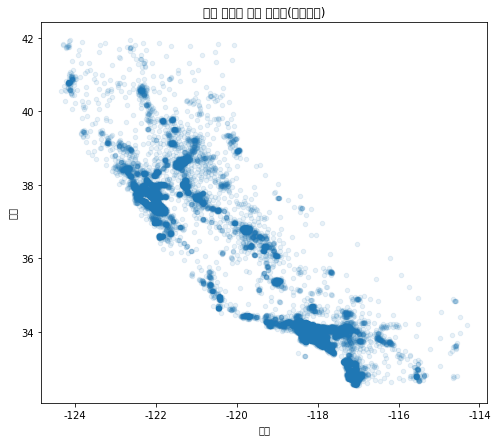

In [ ]:
housing_194915.plot(kind='scatter', x='longitude', y='latitude', figsize=(8,7), alpha = 0.1)
plt.xlabel('경도')
plt.ylabel('위도')
plt.title('위도 경도에 따른 산점도(밀집지역)')

Text(0, 0.5, '위도')

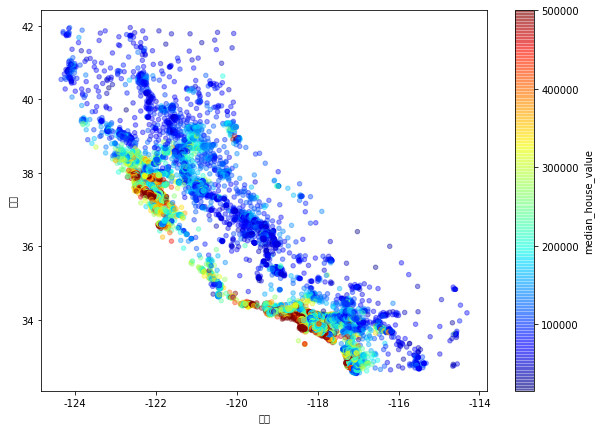

In [ ]:
housing_194915.plot(kind="scatter", x="longitude", y='latitude', alpha = 0.4, figsize=(10,7),
                    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
                    sharex=False)
plt.xlabel('경도')
plt.ylabel('위도')

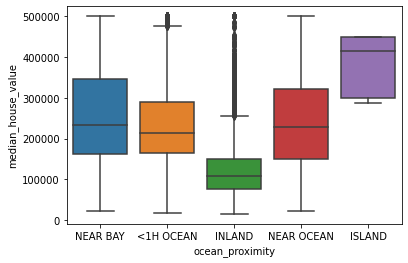

In [ ]:
sns.boxplot(x="ocean_proximity", y="median_house_value", data=housing_194915)
plt.show()

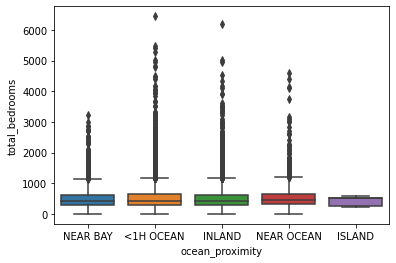

In [ ]:
sns.boxplot(x="ocean_proximity", y="total_bedrooms", data=housing_194915)
plt.show()

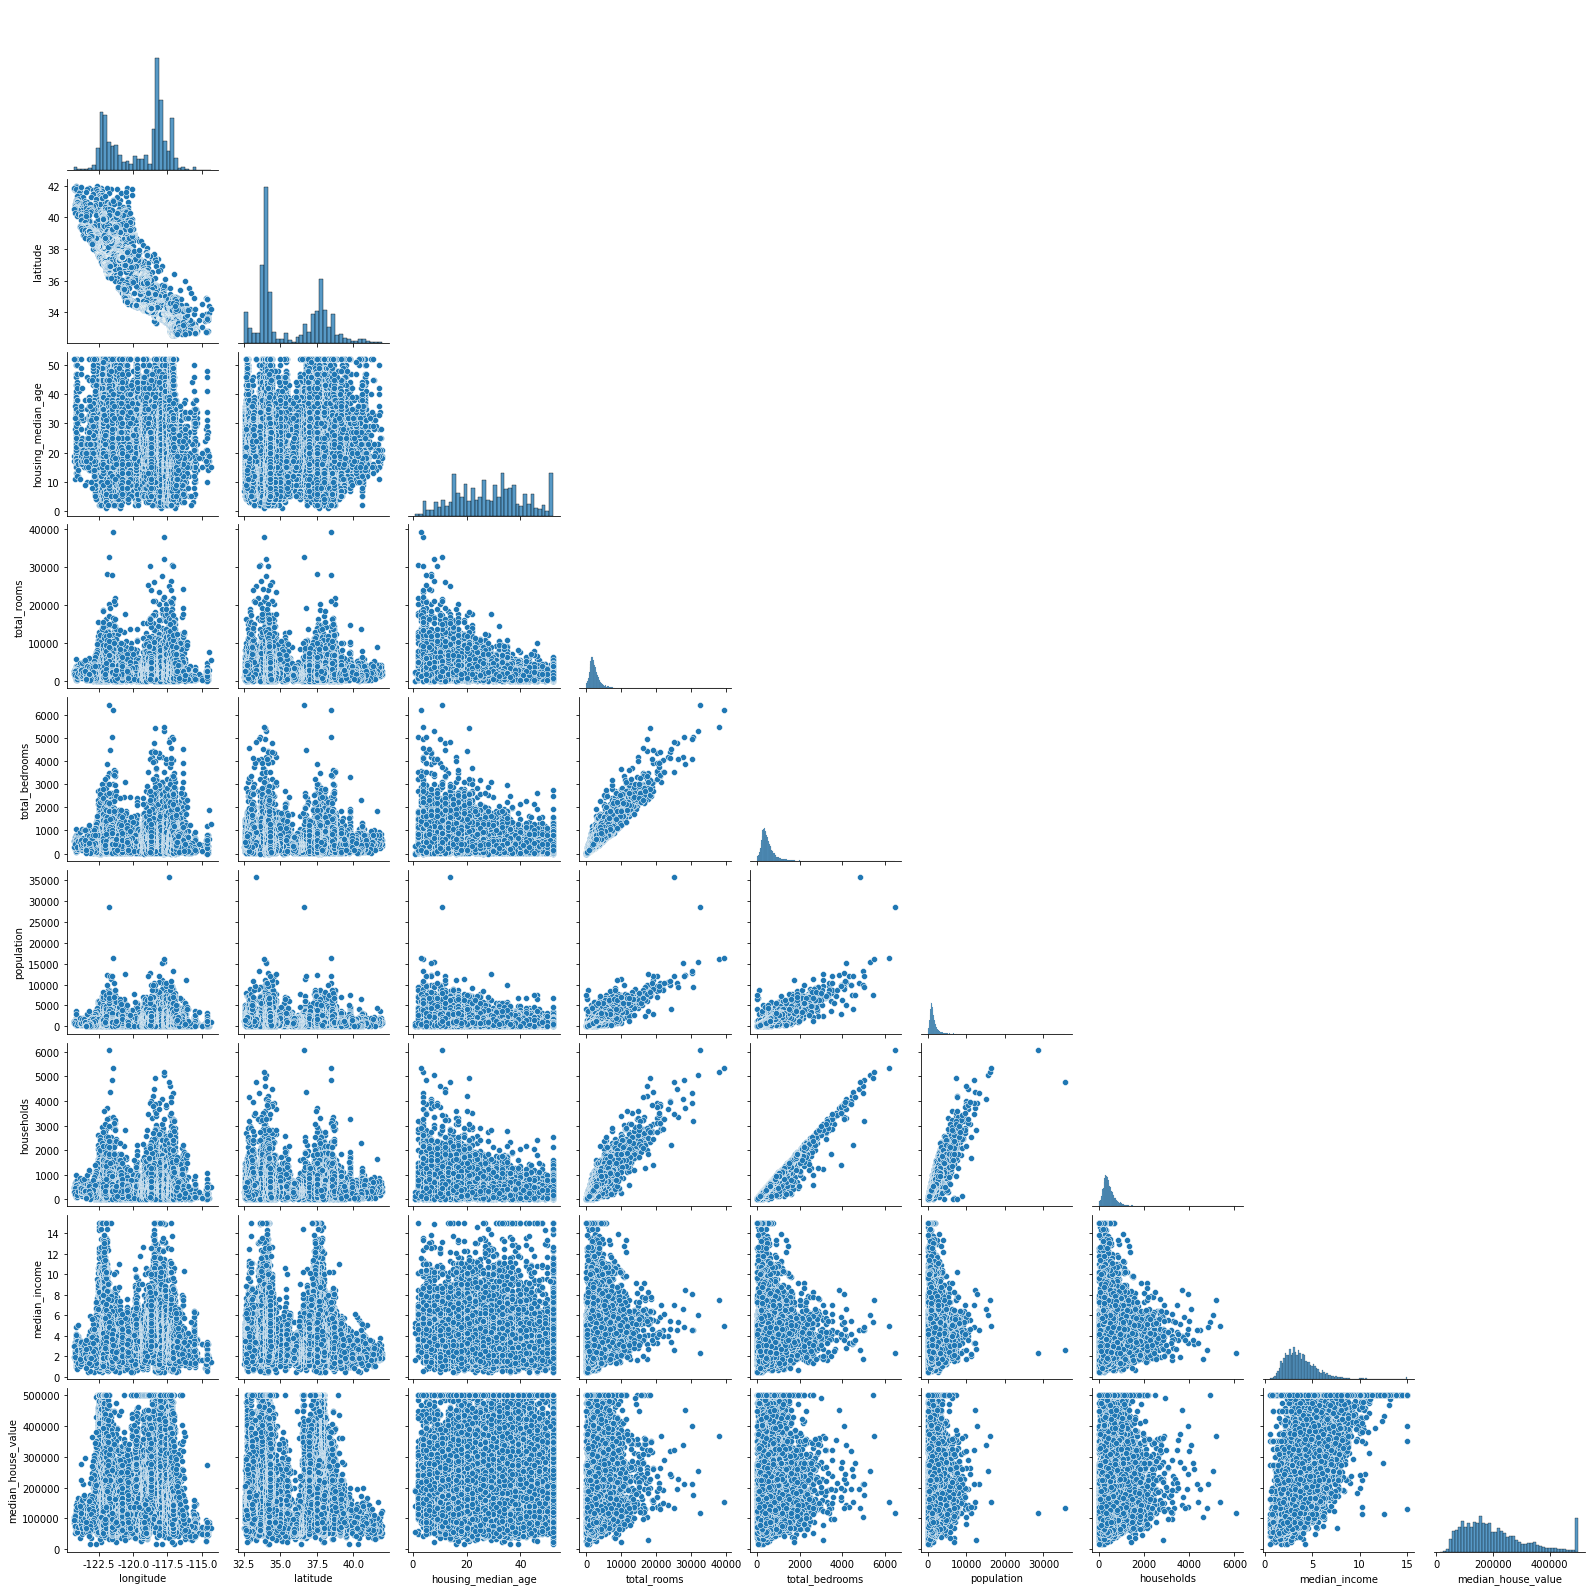

In [ ]:
sns.pairplot(housing_194915, corner=True)
plt.show()

주의점 : median_income이 달러 단위 아님.
housing median age와 median house value의 오른쪽 그래프가 심하게 높아진 것으로 보아 마지막 값으로 한정시킨 것으로 생각 된다.
median house value의 특성은 예측하는데 레이블로 사용되기 때문에 아마 오른쪽이 심하게 높아진 데이터를 처리해야하는 방법이 필요하다.


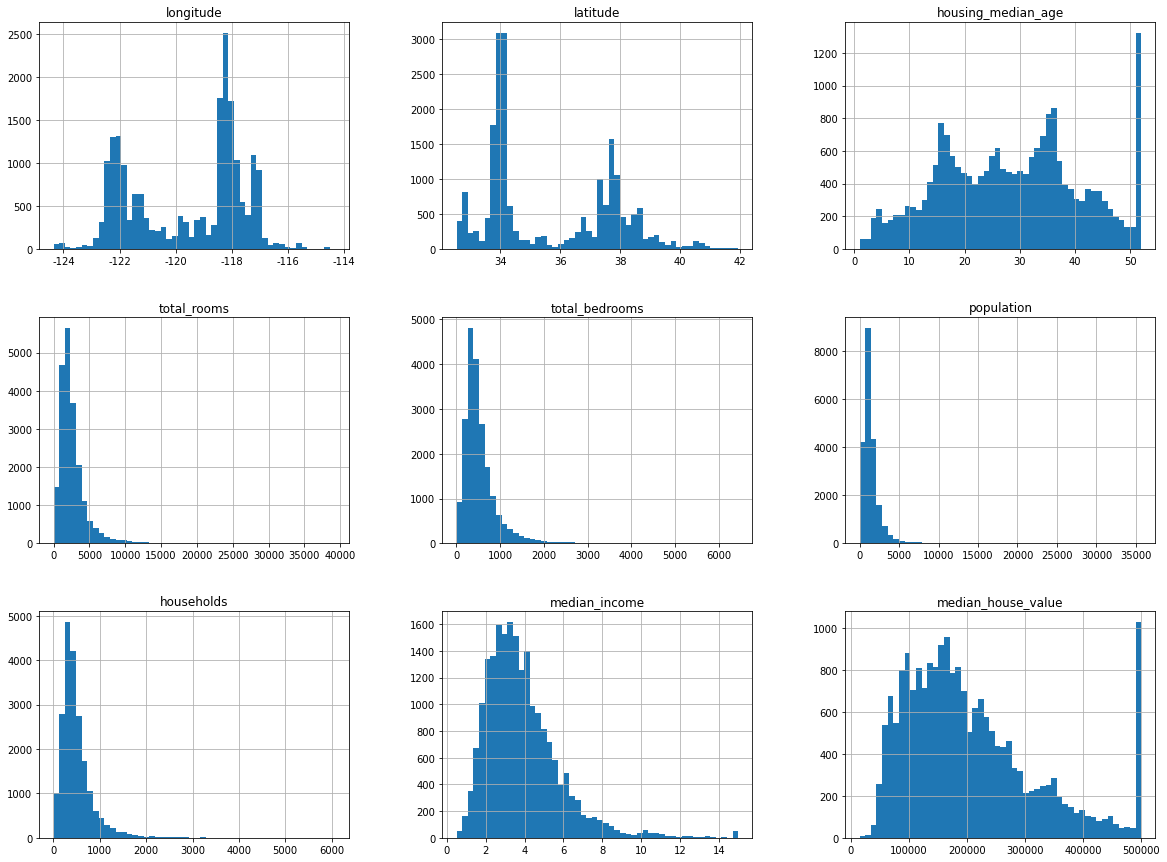

In [ ]:
# 히스토그램
%matplotlib inline
import matplotlib.pyplot as plt
housing_194915.hist(bins=50, figsize=(20,15))
plt.show()

3개의 변수 + 상관계수 만들기

- feature간의 표준 상관계수 corr()을 사용한다.

In [ ]:
housing_194915['rooms_p_household']=housing_194915.total_rooms / housing_194915.households
housing_194915['bedrooms_p_room'] = housing_194915.total_bedrooms / housing_194915.total_rooms
housing_194915['population_p_household'] = housing_194915.population / housing_194915.households

In [ ]:
corr = housing_194915.corr()
corr['median_house_value'].sort_values(ascending=False)

median_house_value        1.000000
median_income             0.688075
rooms_p_household         0.151948
total_rooms               0.134153
housing_median_age        0.105623
households                0.065843
total_bedrooms            0.049686
population_p_household   -0.023737
population               -0.024650
longitude                -0.045967
latitude                 -0.144160
bedrooms_p_room          -0.255880
Name: median_house_value, dtype: float64

In [ ]:
# null값 및 전체 특성 drop을 통해 삭제하기
housing_194915.drop(['total_rooms','households','total_bedrooms',
                     'population_p_household'], axis=1, inplace=True)

결측치는 열 평균으로 맞춰주기

In [ ]:
housing_194915

,longitude,latitude,housing_median_age,population,median_income,median_house_value,ocean_proximity,rooms_p_household,bedrooms_p_room
0,-122.23,37.88,41.0,322.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591
1,-122.22,37.86,21.0,2401.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797
2,-122.24,37.85,52.0,496.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516
3,-122.25,37.85,52.0,558.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458
4,-122.25,37.85,52.0,565.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,1.5603,78100.0,INLAND,5.045455,0.224625
20636,-121.21,39.49,18.0,356.0,2.5568,77100.0,INLAND,6.114035,0.215208
20637,-121.22,39.43,17.0,1007.0,1.7000,92300.0,INLAND,5.205543,0.215173
20638,-121.32,39.43,18.0,741.0,1.8672,84700.0,INLAND,5.329513,0.219892


In [ ]:
housing_194915['bedrooms_p_room'].fillna(housing_194915['bedrooms_p_room'].mean(), inplace=True)

In [ ]:
housing_194915.isna().sum()

longitude             0
latitude              0
housing_median_age    0
population            0
median_income         0
median_house_value    0
ocean_proximity       0
rooms_p_household     0
bedrooms_p_room       0
dtype: int64

One-Hot-Encoding

> 범주형 입력 특성인 ocean_proximity를 수치데이터로 변환하기


In [ ]:
one_hot = pd.get_dummies(housing_194915['ocean_proximity'])
housing_194915 = pd.concat([housing_194915, one_hot], axis=1)
housing_194915.drop(['ocean_proximity'], axis=1, inplace=True)

In [ ]:
housing_194915.head()

,longitude,latitude,housing_median_age,population,median_income,median_house_value,rooms_p_household,bedrooms_p_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,322.0,8.3252,452600.0,6.984127,0.146591,0,0,0,1,0
1,-122.22,37.86,21.0,2401.0,8.3014,358500.0,6.238137,0.155797,0,0,0,1,0
2,-122.24,37.85,52.0,496.0,7.2574,352100.0,8.288136,0.129516,0,0,0,1,0
3,-122.25,37.85,52.0,558.0,5.6431,341300.0,5.817352,0.184458,0,0,0,1,0
4,-122.25,37.85,52.0,565.0,3.8462,342200.0,6.281853,0.172096,0,0,0,1,0


특성 스케일링

- 모든 특성의 범위를 같도록 만들어주는 방법

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(data))
print("max of data = ", scaler.data_max_)
print("min of data = ", scaler.data_min_)
print("data range = ", scaler.data_range_)
print("<data scaling> \n", scaler.transform(data))
print('[2, 2] minmax scaling =', scaler.transform([[2, 2]]))

MinMaxScaler()
max of data =  [ 1. 18.]
min of data =  [-1.  2.]
data range =  [ 2. 16.]
<data scaling> 
 [[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
[2, 2] minmax scaling = [[1.5 0. ]]


In [ ]:
from sklearn.preprocessing import StandardScaler

data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
print('mean = ', scaler.mean_)
print('variance = ', scaler.var_)
print('z-score = \n', scaler.transform(data))
print('[2, 2] transformation result = ', scaler.transform([[2, 2]]))

StandardScaler()
mean =  [0.5 0.5]
variance =  [0.25 0.25]
z-score = 
 [[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[2, 2] transformation result =  [[3. 3.]]


머신러닝

In [ ]:
X, y = housing_194915.drop(['median_house_value'], axis=1), housing_194915['median_house_value']


In [ ]:
# train과 test나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=1)

# min-max scaling( 정규화)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normal = scaler.fit_transform(X_train)

# valid 만들기
x_train, x_valid, y_train, y_valid = train_test_split(X_normal, y_train,
                                                      test_size=0.2, random_state=1)

선형회귀 모델

In [ ]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x_train, y_train)


LinearRegression()

In [ ]:
y_pred_li = linear.predict(x_train)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lin_R2 = r2_score(y_train, y_pred_li)
lin_mae = mean_absolute_error(y_train, y_pred_li)
print(lin_R2)
print(lin_mae)

0.624211813272781
51516.31446363971


In [ ]:
y_pred_li = linear.predict(x_valid)

In [ ]:
lin_R2 = r2_score(y_valid, y_pred_li)
lin_mae = mean_absolute_error(y_valid, y_pred_li)
print(lin_R2)
print(lin_mae)

0.6276659644943523
50978.07769321242


의사결정나무

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_tr = tree.predict(x_train)

lin_R2 = r2_score(y_train, y_pred_tr)
lin_mae = mean_absolute_error(y_train, y_pred_tr)
print(lin_R2)
print(lin_mae)

1.0
0.0


In [ ]:
y_pred_tr = tree.predict(x_valid)

In [ ]:
tree_R2 = r2_score(y_valid, y_pred_tr)
tree_mae = mean_absolute_error(y_valid, y_pred_tr)
print(tree_R2)
print(tree_mae)

0.6075780784992787
45929.623372691494


랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_rf = tree.predict(x_train)

rf_R2 = r2_score(y_train, y_pred_rf)
rf_mae = mean_absolute_error(y_train, y_pred_rf)
print(rf_R2)
print(rf_mae)

1.0
0.0


In [ ]:
y_pred_rf = tree.predict(x_valid)

In [ ]:
rf_R2 = r2_score(y_valid, y_pred_rf)
rf_mae = mean_absolute_error(y_valid, y_pred_rf)
print(rf_R2)
print(rf_mae)

0.6075780784992787
45929.623372691494


XGBoost 회귀

In [ ]:
import xgboost

xgb_model = xgboost.XGBRegressor()
xgb_model.fit(x_train, y_train)

[00:42:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred_xgb = xgb_model.predict(x_train)

xgb_R2 = r2_score(y_train, y_pred_xgb)
xgb_mae = mean_absolute_error(y_train, y_pred_xgb)
print(xgb_R2)
print(xgb_mae)

0.7759448268427086
38453.01892885532


In [ ]:
y_pred_xgb = xgb_model.predict(x_valid)

In [ ]:
xgb_R2 = r2_score(y_valid, y_pred_xgb)
xgb_mae = mean_absolute_error(y_valid, y_pred_xgb)
print(xgb_R2)
print(xgb_mae)

0.761740789092537
39396.325241731


k-fold교차검증

In [ ]:
def display_scores(model, scores):
  print('모델평가결과')
  print('평균 : ', scores.mean())
  print('표준편차 : ', scores.std())

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree, x_valid, y_valid,
                              scoring = 'neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

lin_scores = cross_val_score(linear, x_valid, y_valid,
                              scoring = 'neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

rf_scores = cross_val_score(rf, x_valid, y_valid,
                              scoring = 'neg_mean_squared_error', cv=10)
rf_rmse_scores = np.sqrt(-rf_scores)

xgb_scores = cross_val_score(xgb_model, x_valid, y_valid,
                              scoring = 'neg_mean_squared_error', cv=10)
xgb_rmse_scores = np.sqrt(-xgb_scores)

[00:43:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

최종평가

In [ ]:
x_test_nor = scaler.transform(X_test)

In [ ]:
final_pred = xgb_model.predict(x_test_nor)

In [ ]:
from sklearn.metrics import mean_squared_error
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, final_pred)

In [ ]:
print('RMSE:', final_rmse)
print('R2 : ', final_r2 )

RMSE: 56549.08224361726
R2 :  0.7562078962210306
